<a href="https://colab.research.google.com/github/riyamendon99/CSE575-SML-Riya-Mendon/blob/main/F23_HW4_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Name: Riya Mendon ASU ID: 1229584722***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/')

In [ ]:
%pwd

'/content'

In [ ]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
import sys; sys.path.append('../..') ; sys.path.append('..') ; from my_utils import *

import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
# dummy trainloader
trainloader = data.DataLoader(data.TensorDataset(torch.Tensor(1), torch.Tensor(1)), batch_size=1, shuffle=True)
device = torch.device('cpu')

import matplotlib.pyplot as plt

In this homework, there are three different datasets consisting of 2-dimensional input features and binary class labels, and you will be asked to implement machine learning classifiers.

Let's begin by importing some libaries.

Next, we set a random seed for reproducibility.

In [ ]:
import numpy as np
import random

seed = 0
np.random.seed(seed)
torch.random.manual_seed(seed)
random.seed(seed)

# Concentric annuli


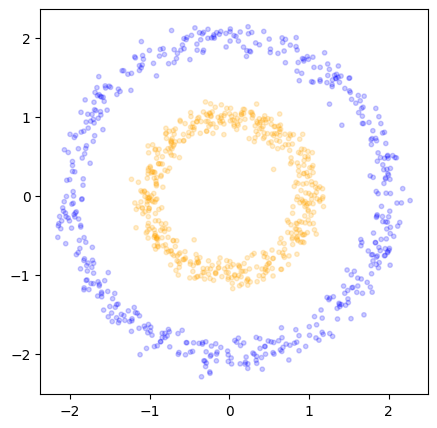

In [ ]:
X, y = sample_annuli()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_scatter(ax, X, y)

[2pt] Let's start by implmenting a logistic regression model. Fill the template below to complete the logisitc regression model. Use the binary cross entropy loss, torch.nn.BCELoss.

(i) Complete the model, (ii) finish the training loop, (iii) present the results with a figure (see the example below) and the classification accuracy

In [ ]:
class Model(nn.Module):
    def __init__(self,device="cpu"):
        super(Model, self).__init__()
        #Defining a Linear layer and passing 2 features
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      x = self.linear(x)
      y = self.sigmoid(x)
      return y

In [ ]:
model = Model(2).to(device)

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-6)
loss_function = torch.nn.BCELoss()

In [ ]:
# complete the following training loop.
for itr in range(1, 1001):
    optimizer.zero_grad()
    yh = torch.squeeze(model(X)) # forward pass
    loss = loss_function(yh.float(),y.float()) # computing the loss
    loss.backward() # backward pass
    if itr%100 == 0:
      print("Number of Iteration ", itr, " Loss is ", loss)
    optimizer.step()


Number of Iteration  100  Loss is  tensor(0.6913, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  200  Loss is  tensor(0.6913, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  300  Loss is  tensor(0.6913, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  400  Loss is  tensor(0.6913, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  500  Loss is  tensor(0.6913, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  600  Loss is  tensor(0.6913, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  700  Loss is  tensor(0.6913, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  800  Loss is  tensor(0.6913, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  900  Loss is  tensor(0.6913, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  1000  Loss is  tensor(0.6913, grad_fn=<BinaryCrossEntropyBackward0>)


In [ ]:
prediction = (yh >= 0.5).float().view(-1)
accuracy = ((prediction == y.float()).float().mean().item())*100
print("Accuracy is: {:.2f}%".format(accuracy))

Accuracy is: 52.73%


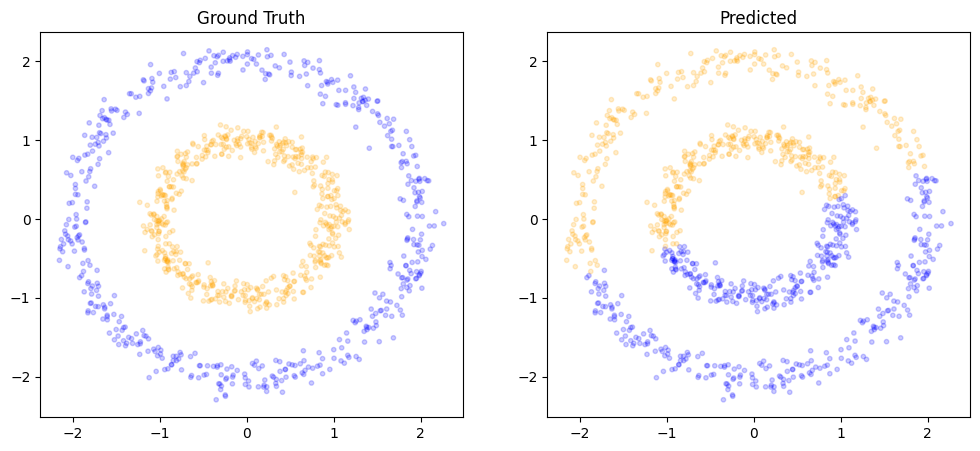

In [ ]:
# visualize the result and report the accuracy
with torch.no_grad():
  #fig = plt.figure(figsize=(4,4))
  fig, ax = plt.subplots(1, 2, figsize=(12, 5))
  plot_scatter(ax[0], X, y)
  ax[0].set_title("Ground Truth")

  plot_scatter(ax[1], X, prediction)
  ax[1].set_title("Predicted")
  plt.show()

It is obvious that the logistic regression would not be able to distinguish two classes (not linearly separate data). You will have to build another model.

[3pt] In the class template below, implement your own model that will achieve 100% accuracy in classifying the data poitns in training set. There is one restriction; you are allowed to use "one" linear layer for your implementation as in the logistic regression model above. But you are allowed to use as many nonlinear functions as needed.  

In [ ]:
class Model(nn.Module):
    def __init__(self,device="cpu"):
        super(Model, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64,1),
            nn.Sigmoid())

    def forward(self, x):
        return self.hidden(x)

In [ ]:
model = Model().to(device)

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-6)
loss_function = torch.nn.BCELoss()

In [ ]:
for itr in range(1, 1001):
    optimizer.zero_grad()
    yh = model(X)
    loss = loss_function(yh, y.float().view(-1, 1))
    loss.backward()
    optimizer.step()
    if itr % 100 == 0:
        print("Number of Iteration ", itr, " Loss is ", loss.item())


Number of Iteration  100  Loss is  0.014602850191295147
Number of Iteration  200  Loss is  0.003935729153454304
Number of Iteration  300  Loss is  0.0019092335132882
Number of Iteration  400  Loss is  0.001144539681263268
Number of Iteration  500  Loss is  0.0007687955512665212
Number of Iteration  600  Loss is  0.0005540394922718406
Number of Iteration  700  Loss is  0.0004181872645858675
Number of Iteration  800  Loss is  0.0003268925647716969
Number of Iteration  900  Loss is  0.00026254644035361707
Number of Iteration  1000  Loss is  0.00021553401893470436


In [ ]:
prediction = (yh >= 0.5).float().view(-1)
accuracy = ((prediction == y.float()).float().mean().item())*100
print("Accuracy is : {:.2f}%".format(accuracy))

Accuracy is : 100.00%


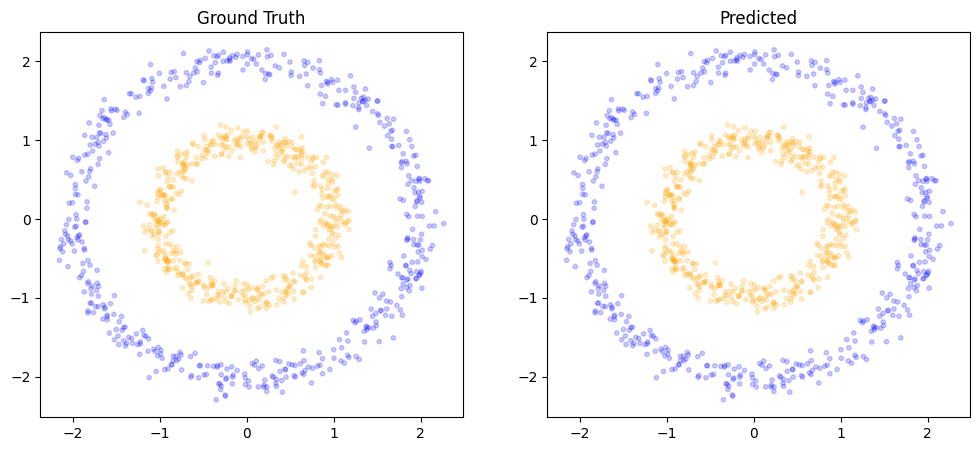

In [ ]:
with torch.no_grad():
  fig, ax = plt.subplots(1, 2, figsize=(12, 5))
  plot_scatter(ax[0], X, y)
  ax[0].set_title("Ground Truth")

  plot_scatter(ax[1], X, prediction)
  ax[1].set_title("Predicted")
  plt.show()




# Spiral dataset


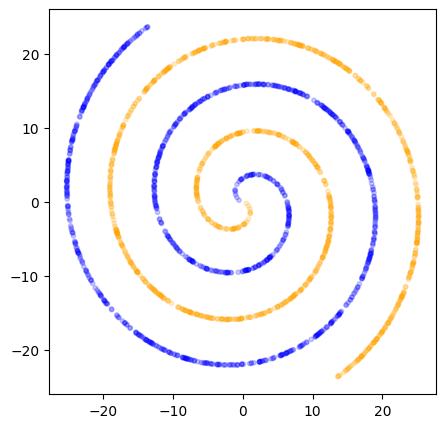

In [ ]:
X, y = sample_spiral()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_scatter(ax, X, y)

It's obvious that neither the logistic regression nor the model you developed for the second dataset would not work for this dataset.

[2pt] implemented a neural network of your choice and achieve 100% classification accuracy

In [ ]:
class Model(nn.Module):
    def __init__(self,device="cpu"):
        super(Model, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(2,50),
            nn.Tanh(),
            nn.Linear(50,50),
            nn.Tanh(),
            nn.Linear(50,1))
        #for p in self.linear_layer.parameters(): torch.nn.init.zeros_(p)

    def forward(self, x):
        y = self.net(x)
        y = torch.sigmoid(y)
        return y

In [ ]:
model = Model().to(device)

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-6)

In [ ]:
for itr in range(1, 1001):
    optimizer.zero_grad()
#    x0, y = sample_annuli(device=device, n_samples=1024)

    yh = model(X)
    loss = nn.BCELoss()(yh.squeeze(), y.float())
    print(itr,loss.item())
    #loss_traj[itr-1] = loss.item()
    loss.backward()
    optimizer.step()

1 0.7018742561340332
2 0.705581784248352
3 0.6916510462760925
4 0.6712468862533569
5 0.6729579567909241
6 0.67839515209198
7 0.6738461256027222
8 0.6688999533653259
9 0.6670092940330505
10 0.667113184928894
11 0.6681512594223022
12 0.668473482131958
13 0.6668174266815186
14 0.6641663908958435
15 0.6624791622161865
16 0.6623583436012268
17 0.6627517342567444
18 0.6626333594322205
19 0.661916196346283
20 0.6607850193977356
21 0.6592674851417542
22 0.6577192544937134
23 0.6567679047584534
24 0.6563241481781006
25 0.6554856300354004
26 0.653842568397522
27 0.651963472366333
28 0.6503309607505798
29 0.648888885974884
30 0.6475531458854675
31 0.6455862522125244
32 0.642839252948761
33 0.6405478715896606
34 0.6386674642562866
35 0.6363977789878845
36 0.6337749361991882
37 0.6315790414810181
38 0.6289664506912231
39 0.6254294514656067
40 0.6225400567054749
41 0.6195906400680542
42 0.6165441274642944
43 0.6139678359031677
44 0.6118003129959106
45 0.6098295450210571
46 0.6080595254898071
47 0.60

torch.Size([2048, 1])
tensor([0, 0, 0,  ..., 1, 1, 1])


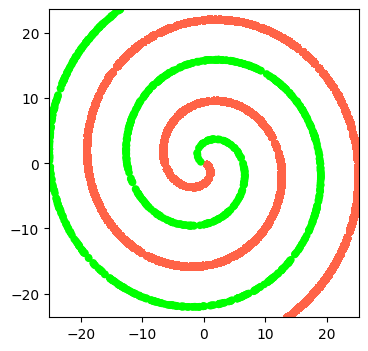

torch.Size([2048, 2])
tensor(0)


In [ ]:
with torch.no_grad():
    fig = plt.figure(figsize=(4,4))
    axes = []
    axes.append(fig.add_subplot(1,1,1))#,sharex=True,sharey=True))
    xs, ys = X, y#sample_gaussian(n_samples=200) ; s = torch.linspace(0, 1, 10)
    y_pred = model(xs)
    print(y_pred.shape)
    label = (y_pred[:,0] >= 0.5).long()
    print(label)
    colors = ['lime','tomato']
    for i in range(1024):
        axes[0].scatter(xs[i,0], xs[i,1], c=colors[label[i]], edgecolor='none', s=30)
        axes[0].scatter(xs[i+1024:,0], xs[i+1024:,1], c=colors[label[i+1024]], edgecolor='none', s=30)
    axes[0].set_xlim(xs[:,0].min(), xs[:,0].max()) ; axes[0].set_ylim(xs[:,1].min(), xs[:,1].max())
    plt.show()

    print(xs.shape)
    err = torch.sum(torch.abs(label - y))
    print(err)



In [ ]:
accuracy = ((label == y).float().mean().item())*100
print("Accuracy is : {:.2f}%".format(accuracy))

Accuracy is : 100.00%
